# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1300)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1300)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

543

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
print("Beginning Data Retrieval")
print("-----------------------------")
  
    
#Set list to hold response for
units = "metric"
city = []
lat = []
lon = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# keep track of record count
process_number = 1
set_count = 1
   

# Weathermap url to retrieve data on cities 
base_url = "http://api.openweathermap.org/data/2.5/weather?" 

# query 
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for cityname in cities:
    

    try:
        
        response = requests.get(query_url + cityname).json()
        city.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f'Processing Record {process_number} of Set {set_count} | {cityname}')
        if process_number > 50:
            process_number = 0
            set_count = set_count + 1
            time.sleep(1) 
        else: 
            process_number = process_number + 1
  
        
        
# Exceptional handling to keep API calls to success   
    except (KeyError):
        print("Skipping city not found.")
        
    
              
print("-----------------------------")                
print(f"Data Retrieval Complete-----")
print("-----------------------------")
             
    
    
    
    
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | boden
Processing Record 3 of Set 1 | nouadhibou
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | hilo
Skipping city not found.
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | hobart
Skipping city not found.
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | lubao
Processing Record 11 of Set 1 | vanimo
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | ibirama
Processing Record 22 of Set 1 | shurugwi


Processing Record 31 of Set 4 | ieud
Processing Record 32 of Set 4 | iqaluit
Processing Record 33 of Set 4 | ancud
Processing Record 34 of Set 4 | haines junction
Processing Record 35 of Set 4 | ostrovnoy
Processing Record 36 of Set 4 | bethel
Processing Record 37 of Set 4 | mahebourg
Processing Record 38 of Set 4 | neiafu
Processing Record 39 of Set 4 | wenling
Processing Record 40 of Set 4 | prainha
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | north bend
Processing Record 43 of Set 4 | kampot
Processing Record 44 of Set 4 | ballina
Processing Record 45 of Set 4 | hailar
Processing Record 46 of Set 4 | atbasar
Processing Record 47 of Set 4 | pontianak
Processing Record 48 of Set 4 | tiznit
Processing Record 49 of Set 4 | cacapava do sul
Processing Record 50 of Set 4 | le port
Processing Record 51 of Set 4 | laguna
Processing Record 0 of Set 5 | novichikha
Processing Record 1 of Set 5 | burayevo
Processing Record 2 of Set 5 | camacha
Processing Record 3

Skipping city not found.
Skipping city not found.
Processing Record 16 of Set 8 | tisul
Processing Record 17 of Set 8 | dalaba
Processing Record 18 of Set 8 | itacarambi
Processing Record 19 of Set 8 | burnie
Processing Record 20 of Set 8 | ahipara
Processing Record 21 of Set 8 | ombessa
Processing Record 22 of Set 8 | keningau
Processing Record 23 of Set 8 | veliko gradiste
Processing Record 24 of Set 8 | vostok
Processing Record 25 of Set 8 | vardo
Processing Record 26 of Set 8 | sao filipe
Processing Record 27 of Set 8 | timizart
Processing Record 28 of Set 8 | whitehorse
Processing Record 29 of Set 8 | richards bay
Processing Record 30 of Set 8 | mogadishu
Processing Record 31 of Set 8 | aklavik
Processing Record 32 of Set 8 | donskoye
Processing Record 33 of Set 8 | puno
Processing Record 34 of Set 8 | kalakamati
Processing Record 35 of Set 8 | anqiu
Processing Record 36 of Set 8 | ahuimanu
Processing Record 37 of Set 8 | mao
Processing Record 38 of Set 8 | boguchany
Processing Re

In [8]:
city_dict = {
    "City":city,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
city_data = pd.DataFrame(city_dict)
city_data.head()

NameError: name 'lat' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
city_data.to_csv("output_data", index=False)

In [57]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,4.990000e+02
mean,18.979141,18.755007,13.052485,73.621242,62.264529,3.186653,1.636776e+09
std,34.136831,90.364382,13.515780,20.061823,38.271254,2.220279,8.682672e+01
min,-54.800000,-175.200000,-30.190000,7.000000,0.000000,0.000000,1.636775e+09
25%,-11.240550,-58.537100,3.875000,64.000000,21.500000,1.520000,1.636776e+09
50%,22.692500,27.213200,16.220000,77.000000,75.000000,2.750000,1.636776e+09
75%,47.633250,96.911550,24.565000,90.000000,99.500000,4.330000,1.636776e+09
max,78.218600,178.416700,35.030000,100.000000,100.000000,13.860000,1.636776e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [58]:
unique = city_data["Humidity"].unique()
unique


array([ 66,  97,  73,  90,  87,  88,  59,  81,  61,  69,  83,  38,  86,
        64,  51,  77,  49,  56,  53,  39,  79,  72,  78,  91,  93,  99,
        74,  94,  80,  14,  68, 100,  96,  84,  76,  41,  75,  95,  65,
        63,  71,  42,  70,  19,  85,  44,  62,  57,  89,  55,  67,  92,
        36,  82,  46,  45,  47,  30,  26,  58,  37,  43,  27,  40,  48,
        21,  20,  60,  34,  31,  35,  52,  98,  24,   7,  18,  15,  54,
        50,  32,  23,  33,  29], dtype=int64)

In [59]:
#  Get the indices of cities that have humidity over 100%.
cities_humidity = city_data["Humidity"].max()
indices = cities_humidity
indices
# There are not cities that have humidity over 100%

100

In [60]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = {
    "City":city,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
   
}
clean_city_data = pd.DataFrame(clean_city_data)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,26.08,66,34,5.58,PF,1636775936
1,Boden,65.8252,21.6886,-4.00,97,31,1.03,SE,1636775936
2,Nouadhibou,20.9310,-17.0347,19.99,73,0,2.06,MR,1636775937
3,Albany,42.6001,-73.9662,5.73,90,4,1.31,US,1636775937
4,Hilo,19.7297,-155.0900,23.78,87,63,0.89,US,1636775937


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
# The maxium x value for chart
# x_limit = 100

# List of values from 0 to 100 each 
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max Temp"]

# create a title, xlabel and ylabel
plt.title("City Latitude vs. Max Temperature (11/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.tight_layout()
# correlation = st.pearson("Lat", "Max Temp")

# create scatter plot, the size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
# print(f"correlation between both factors is {round(correlation[0], 2)}")
      
plt.show()

NameError: name 'clean_city_data' is not defined

## Latitude vs. Humidity Plot

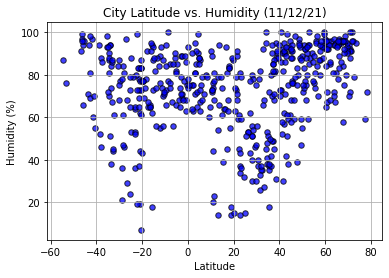

In [81]:
# The maxium x value for chart
# x_limit = 100

# List of values from 0 to 100 each 
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]

# create a title, xlabel and ylabel
plt.title("City Latitude vs. Humidity (11/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout
# create scatter plot, the size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.show()

## Latitude vs. Cloudiness Plot

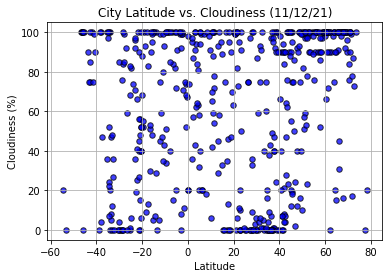

In [82]:
# The maxium x value for chart
x_limit = 100

# List of values from 0 to 100 each 
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]

# create a title, xlabel and ylabel
plt.title("City Latitude vs. Cloudiness (11/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout

# create scatter plot, the size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.show()

## Latitude vs. Wind Speed Plot

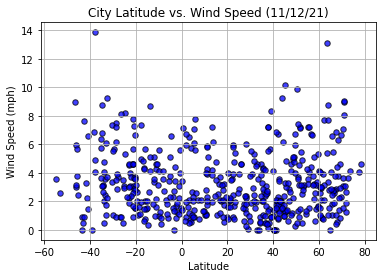

In [83]:
# The maxium x value for chart
x_limit = 100

# List of values from 0 to 100 each 
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]

# create a title, xlabel and ylabel
plt.title("City Latitude vs. Wind Speed (11/12/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout


# create scatter plot, the size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.show()

## Linear Regression

In [76]:
# identify the northern hemisphere and do a count
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] > 0]
northcities_count = len(northern_hemisphere)
northcities_count



334

In [87]:
# indentify the southern hemisphere and do a count
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
southerncities_count = len(southern_hemisphere)
southerncities_count

165

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8107010145801028


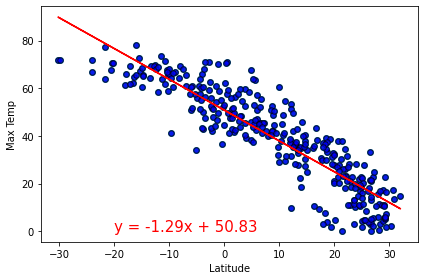

In [96]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Max Temp']
y_values = northern_hemisphere['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,0),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46637647348385625


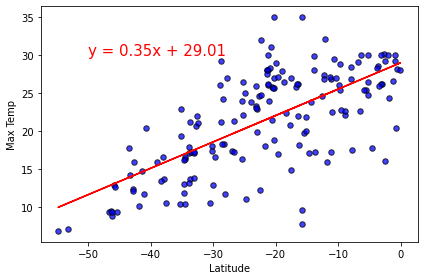

In [134]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.tight_layout()


print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.138090777899987


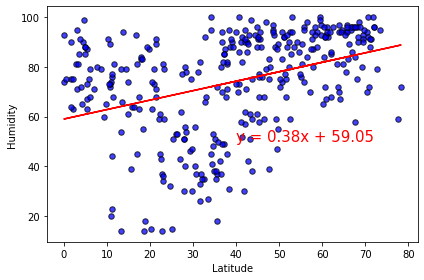

In [136]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.tight_layout()


print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0018803208814988414


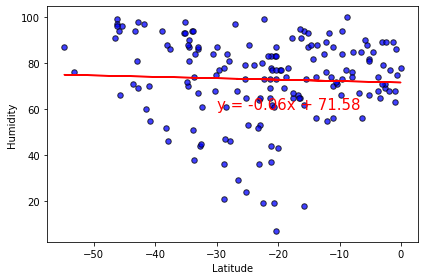

In [139]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.tight_layout()


print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0634670802895715


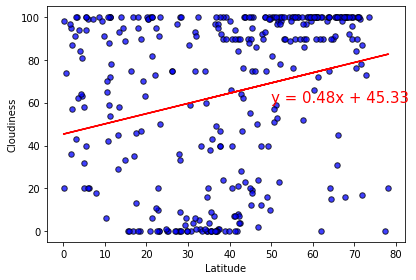

In [143]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50
                     ),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


plt.tight_layout()




print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011047194479743819


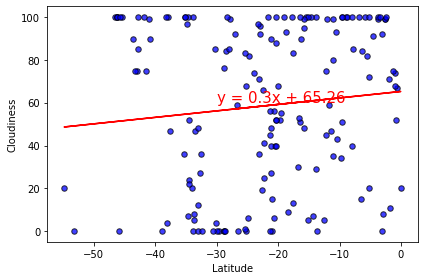

In [144]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.tight_layout()


print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.017432058500852554


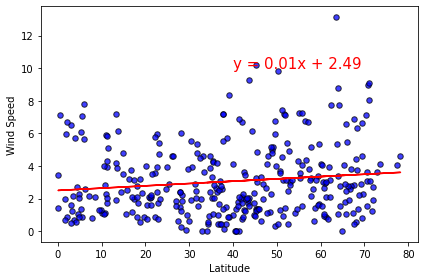

In [149]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')



plt.tight_layout()



print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04870857281438511


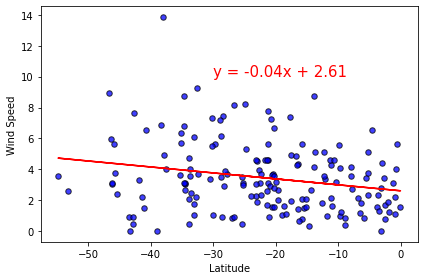

In [154]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 10),fontsize=15,color="red")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             s=30, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.tight_layout()


print(f"The r-squared is: {rvalue**2}")
plt.show()